<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n250.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n60.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.341750,52.283821,43.027349,-7.620739,170.032181,178.714238,-8.682056
1,0.0,1.0,85.450017,47.765168,80.146729,-0.134966,223.226949,221.936718,1.290231
2,0.0,2.0,90.911747,81.320790,49.851172,10.958072,243.041780,231.574858,11.466922
3,0.0,3.0,30.448972,65.882782,48.418105,11.291660,166.041519,156.594692,9.446826
4,0.0,4.0,92.055302,46.794606,89.168425,-2.622436,235.395896,235.875040,-0.479143
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,33.746428,47.764821,55.626744,-0.893698,146.244295,144.804699,1.439596
29996,999.0,26.0,97.187365,21.116072,49.348429,0.782270,178.434136,177.440951,0.993185
29997,999.0,27.0,47.606113,44.399782,55.404891,-0.227641,157.183145,155.634088,1.549056
29998,999.0,28.0,91.308577,24.775229,72.051684,-1.215398,196.920091,197.527355,-0.607264


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.341750,52.283821,43.027349,-7.620739,170.032181,178.714238,-8.682056
1,0.0,1.0,85.450017,47.765168,80.146729,-0.134966,223.226949,221.936718,1.290231
2,0.0,2.0,90.911747,81.320790,49.851172,10.958072,243.041780,231.574858,11.466922
3,0.0,3.0,30.448972,65.882782,48.418105,11.291660,166.041519,156.594692,9.446826
4,0.0,4.0,92.055302,46.794606,89.168425,-2.622436,235.395896,235.875040,-0.479143
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,33.746428,47.764821,55.626744,-0.893698,146.244295,144.804699,1.439596
29996,999.0,26.0,97.187365,21.116072,49.348429,0.782270,178.434136,177.440951,0.993185
29997,999.0,27.0,47.606113,44.399782,55.404891,-0.227641,157.183145,155.634088,1.549056
29998,999.0,28.0,91.308577,24.775229,72.051684,-1.215398,196.920091,197.527355,-0.607264


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    72.341750  52.283821  43.027349  ...  170.032181  178.714238  -8.682056
      1.0    85.450017  47.765168  80.146729  ...  223.226949  221.936718   1.290231
      2.0    90.911747  81.320790  49.851172  ...  243.041780  231.574858  11.466922
      3.0    30.448972  65.882782  48.418105  ...  166.041519  156.594692   9.446826
      4.0    92.055302  46.794606  89.168425  ...  235.395896  235.875040  -0.479143
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   33.746428  47.764821  55.626744  ...  146.244295  144.804699   1.439596
      26.0   97.187365  21.116072  49.348429  ...  178.434136  177.440951   0.993185
      27.0   47.606113  44.399782  55.404891  ...  157.183145  155.634088   1.549056
      28.0   91.308577  24.775229  72.051684  ...  196.920091  197.527355  -0.607264
      29.0   55.862721  41.489048  32.172638  ...  146.358510  138.303221   8.055289

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    72.341750  52.283821  43.027349  ...  170.032181  178.714238  -8.682056
      1.0    85.450017  47.765168  80.146729  ...  223.226949  221.936718   1.290231
      2.0    90.911747  81.320790  49.851172  ...  243.041780  231.574858  11.466922
      3.0    30.448972  65.882782  48.418105  ...  166.041519  156.594692   9.446826
      4.0    92.055302  46.794606  89.168425  ...  235.395896  235.875040  -0.479143
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   33.746428  47.764821  55.626744  ...  146.244295  144.804699   1.439596
      26.0   97.187365  21.116072  49.348429  ...  178.434136  177.440951   0.993185
      27.0   47.606113  44.399782  55.404891  ...  157.183145  155.634088   1.549056
      28.0   91.308577  24.775229  72.051684  ...  196.920091  197.527355  -0.607264
      29.0   55.862721  41.489048  32.172638  ...  146.358510  138.303221   8.055289

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.341750,52.283821,43.027349,-7.620739,170.032181,178.714238,-8.682056
1,0.0,1.0,85.450017,47.765168,80.146729,-0.134966,223.226949,221.936718,1.290231
2,0.0,2.0,90.911747,81.320790,49.851172,10.958072,243.041780,231.574858,11.466922
3,0.0,3.0,30.448972,65.882782,48.418105,11.291660,166.041519,156.594692,9.446826
4,0.0,4.0,92.055302,46.794606,89.168425,-2.622436,235.395896,235.875040,-0.479143
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,33.746428,47.764821,55.626744,-0.893698,146.244295,144.804699,1.439596
29996,999.0,26.0,97.187365,21.116072,49.348429,0.782270,178.434136,177.440951,0.993185
29997,999.0,27.0,47.606113,44.399782,55.404891,-0.227641,157.183145,155.634088,1.549056
29998,999.0,28.0,91.308577,24.775229,72.051684,-1.215398,196.920091,197.527355,-0.607264


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    72.341750  52.283821  43.027349  ...  170.032181  178.714238  -8.682056
      1.0    85.450017  47.765168  80.146729  ...  223.226949  221.936718   1.290231
      2.0    90.911747  81.320790  49.851172  ...  243.041780  231.574858  11.466922
      3.0    30.448972  65.882782  48.418105  ...  166.041519  156.594692   9.446826
      4.0    92.055302  46.794606  89.168425  ...  235.395896  235.875040  -0.479143
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   33.746428  47.764821  55.626744  ...  146.244295  144.804699   1.439596
      26.0   97.187365  21.116072  49.348429  ...  178.434136  177.440951   0.993185
      27.0   47.606113  44.399782  55.404891  ...  157.183145  155.634088   1.549056
      28.0   91.308577  24.775229  72.051684  ...  196.920091  197.527355  -0.607264
      29.0   55.862721  41.489048  32.172638  ...  146.358510  138.303221   8.055289

[30000 rows x 7 columns]

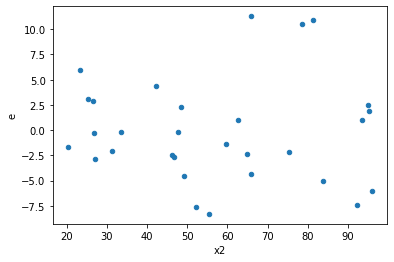

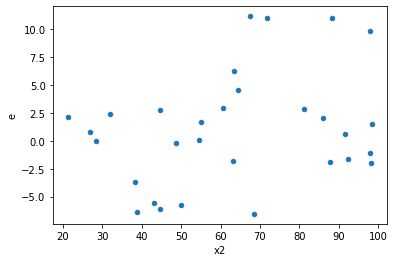

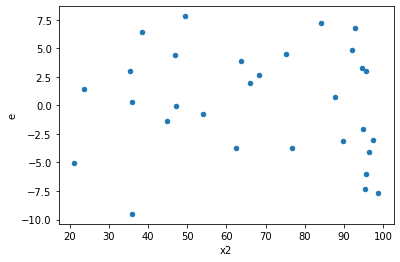

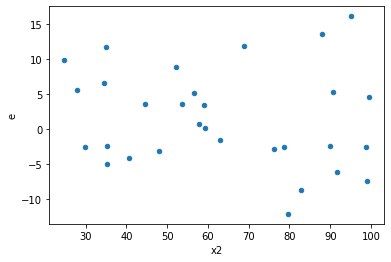

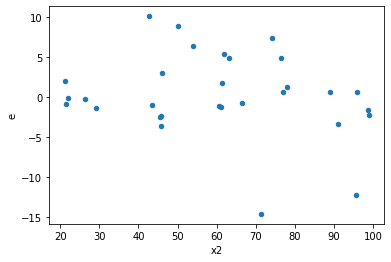

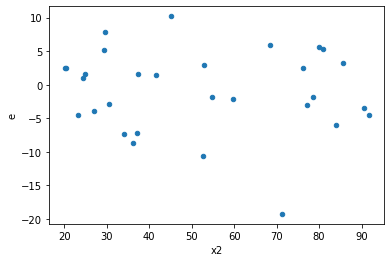

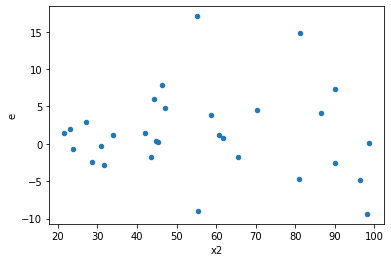

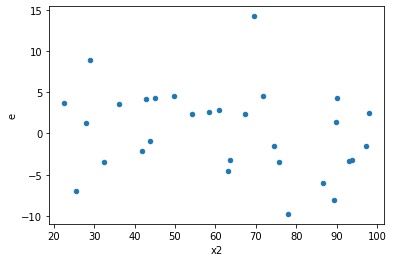

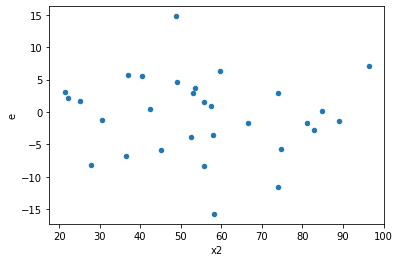

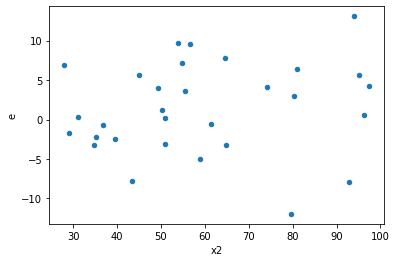

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,81.78248955625135,391.8868548705159,9.086943284027928,43.542983874501765,4.791818603186072,0.02881865525150973,0.9855906723742451,0.014409327625754864,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,90.97231736022734,335.0926723140131,10.108035262247482,37.23251914600146,3.683457583993722,0.06540543668218435,0.9672972816589078,0.032702718341092174,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,377.9961569594523,718.8992235190714,41.9995729954947,79.87769150211903,1.9018691335430367,0.3522520658193724,0.8238739670903138,0.1761260329096862,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,154.24876414876354,361.6068007247655,17.13875157208484,40.17853341386283,2.3443092249090416,0.22038603797361556,0.8898069810131922,0.11019301898680778,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,138.1491318993438,495.24276936644003,15.349903544371532,55.02697437404889,3.5848417037269305,0.07086407092188907,0.9645679645390555,0.03543203546094453,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,62.54899288379779,400.8997525314368,6.949888098199754,44.54441694793742,6.409371822760121,0.010744459367348913,0.9946277703163255,0.0053722296836744565,Reject001=1 : Homoscedasticity
9.0,9.0,9.0,176.16295877891133,468.781926755364,19.573662086545703,52.086880750596,2.661069784503883,0.1610104947832276,0.9194947526083862,0.0805052473916138,Reject001=1 : Homoscedasticity
11.0,9.0,9.0,148.9275399250046,187.64146197300724,16.547504436111623,20.849051330334138,1.2599513969511469,0.7362901651704727,0.6318549174147636,0.36814508258523637,Reject001=1 : Homoscedasticity
12.0,9.0,9.0,72.63402210184493,247.9112270894638,8.070446900204992,27.54569189882931,3.413155707415613,0.08173772551138248,0.9591311372443088,0.04086886275569124,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,81.78248955625135,391.8868548705159,9.086943284027928,43.542983874501765,4.791818603186072,0.02881865525150973,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,90.97231736022734,335.0926723140131,10.108035262247482,37.23251914600146,3.683457583993722,0.06540543668218435,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,232.9434004366457,144.2531962040754,25.88260004851619,16.028132911563933,0.6192628592768755,0.4864425387473531,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,377.9961569594523,718.8992235190714,41.9995729954947,79.87769150211903,1.9018691335430367,0.3522520658193724,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,154.24876414876354,361.6068007247655,17.13875157208484,40.17853341386283,2.3443092249090416,0.22038603797361556,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,138.1491318993438,495.24276936644003,15.349903544371532,55.02697437404889,3.5848417037269305,0.07086407092188907,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,62.54899288379779,400.8997525314368,6.949888098199754,44.54441694793742,6.409371822760121,0.010744459367348913,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,195.83235027137732,62.4671245823054,21.759150030153037,6.940791620256156,0.31898266295502625,0.10394917487560076,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,405.43608909556366,392.9685558290463,45.04845434395152,43.663172869894034,0.9692490787035519,0.9636540534870349,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      942
Reject001=0 : Heteroscedasticity     58
Name: Result_test, dtype: int64